In [32]:
import ast
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA 

import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

In [4]:
# Characters who appear >10 times in the fanfiction, their names gathered into a in a csv file. Converted to pandas DF.
characters = pd.read_csv('myhero_names.csv')

# Archive of Our Own
AO3_train = pd.read_csv('AO3_ships.csv')
AO3_train['published'] = pd.to_datetime(AO3_train['published'])

# Archive of Our Own
AO3_test = pd.read_csv('AO3_ships_spread.csv')
AO3_test['published'] = pd.to_datetime(AO3_test['published'])

# Series overview: Original season number, Number of episodes, First aired, and Last aired.
og_season_anime_airdate = pd.read_csv('og_air_clean.csv')

# Season 1 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Original air date, and English air date.
season_one_anime = pd.read_csv('season_one_clean.csv')

# Season 2-6 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Viewership rating, Original air date, and English air date.
season_two_anime = pd.read_csv('season_two_clean.csv')
season_three_anime = pd.read_csv('season_three_clean.csv')
season_four_anime = pd.read_csv('season_four_clean.csv')
season_five_anime = pd.read_csv('season_five_clean.csv')
season_six_anime = pd.read_csv('season_six_clean.csv')

# Original Video Animation (OVA) titled "Save! Rescue Training!"
# Number (8 total released), Title, Storyboard by, Directed by, Written by, Original release date.
og_vid_animation_anime =  pd.read_csv('OVAs_clean.csv')

# Japan Home Video Release
# Season, Volume, Epsiodes, Release date.
Japan_homevid_release_anime = pd.read_csv('Japan_HV_clean.csv')

# Funimation/Crunchyroll (North America)
# Season, Volume, Episodes, Release date.
funimation_crunchyroll_anime = pd.read_csv('Fun_Crunch_NA_clean.csv')

# Universal Pictures/Manga Entertainment (UK and Ireland)
# Season, Volume, Episodes, Release date.
universalpictures_manga_anime = pd.read_csv('Up_Uk_clean.csv')

# Universal Sony/Madman Entertainment (Australia and New Zealand)
# Season, Volume, Episodes, Release date Universal, Release date Madman.
universalsony_madman_anime = pd.read_csv('Us_Me_clean.csv')

# Manga
manga = pd.read_csv('mangas_clean.csv')

In [5]:
AO3_train.head()

,title,mixed fandom,ships,characters,hits,kudos,published,Deku,Bakugo,Deku & Bakugo,...,Kirashima,Mina & Kirashima,Jirou,Jirou & Denki,Shigaraki Tomura,Deku & Shigaraki Tomura,Aizawa & Shinsou,Nedzu,Deku & Nedzu,Deku & Reader
0,Purple poison flames meet Blue fire,['Fandoms:\n鬼滅の刃 | Demon Slayer: Kimetsu no Ya...,['Dabi | Todoroki Touya & Kochou Shinobu'],"['Dabi | Todoroki Touya', 'Kochou Shinobu']",0,NaN,2023-04-02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Stuck With Babysitter Duty,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Dazai Osamu/Nakahara Chuuya (Bungou Stray Do...,"['Midoriya Izuku', 'Dazai Osamu (Bungou Stray ...",0,NaN,2023-04-02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Power in UA!!!,"['Fandoms:\nChainsaw Man (Anime), 僕のヒーローアカデミア ...","['Bakugou Katsuki/Power', 'Power & Class 1-A']","['Power (Chainsaw Man)', 'Ashido Mina', 'Iida ...",508,7.0,2023-04-02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Balance and Bondeds,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Aizawa Shouta | Eraserhead/Yamada Hizashi | ...,"['Midoriya Izuku', 'Midoriya Inko', 'Bakugou K...",11924,481.0,2023-04-02,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Can't Hold Our Babies,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,['Bakugou Katsuki/Midoriya Izuku/Uraraka Ochak...,"['Bakugou Katsuki', 'Uraraka Ochako', 'Midoriy...",0,NaN,2023-04-02,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Obtaining just the characters presence or absence in the fanfiction.
character_presence = AO3_train.iloc[:,6:]

# Verifying the maximum number is 1, to ensure the binary coding worked. 
check = character_presence.describe()
check 

character_presence.set_index('published', inplace=True)
character_presence

,Deku,Bakugo,Deku & Bakugo,Aizawa,Prez Mic,Aizawa & Prez Mic,Aizawa & Deku,Enjiro,Bakugo & Kirishima,Shoto,...,Kirashima,Mina & Kirashima,Jirou,Jirou & Denki,Shigaraki Tomura,Deku & Shigaraki Tomura,Aizawa & Shinsou,Nedzu,Deku & Nedzu,Deku & Reader
published,,,,,,,,,,,,,,,,,,,,,
2023-04-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-04-02,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2023-04-02,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-28,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-28,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
app_count = character_presence.sum()

In [8]:
app_count.max()

953

In [9]:
app_count.sort_values(ascending = False)

Deku                       953
Bakugo                     686
Deku & Bakugo              601
Aizawa                     435
Shoto                      366
Aizawa & Deku              322
Deku & Shoto               321
Prez Mic                   319
Aizawa & Prez Mic          316
Bakugo & Shoto             285
Shinsou                    262
Uraraka                    236
Deku & Uraraka             236
Deku & Prez Mic            212
Deku & Shinsou             208
Denki                      171
Aizawa & Shinsou           168
All Might                  150
Deku & All Might           150
Hawks                      149
Dabi & Hawks               149
Dabi                       149
Deku & Class               134
Class                      134
Mina                       126
Kirashima                  126
Mina & Kirashima           126
Denki & Shinsou            117
Shigaraki Tomura            92
Deku & Shigaraki Tomura     92
Reader                      89
Jirou                       89
Jirou & 

In [10]:
top_rel = AO3_train.iloc[:, :10]

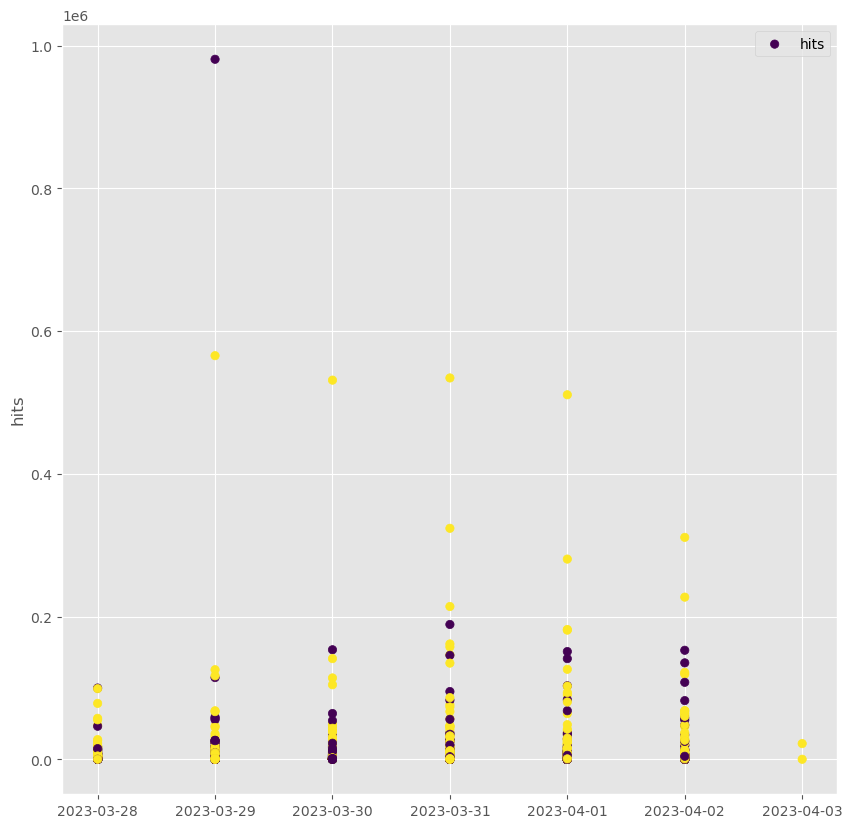

In [11]:
plt.scatter(x = 'published', y = 'hits', c = 'Deku', data = top_rel)
plt.legend()
plt.ylabel('hits')
plt.show()


In [12]:
group = top_rel.groupby('Deku & Bakugo')

In [13]:
print(group)

In [14]:
grouped_data = top_rel.groupby(['published', 'Deku & Bakugo']).mean()['hits'].unstack()

In [15]:
grouped_data

Deku & Bakugo,0,1
published,,
2023-03-28,4541.417219,6080.180556
2023-03-29,9797.262009,11843.977011
2023-03-30,5349.956710,11664.271845
2023-03-31,9453.967153,12139.205128
2023-04-01,6598.230994,12900.125000
2023-04-02,9932.286550,9229.010753
2023-04-03,22001.000000,0.000000


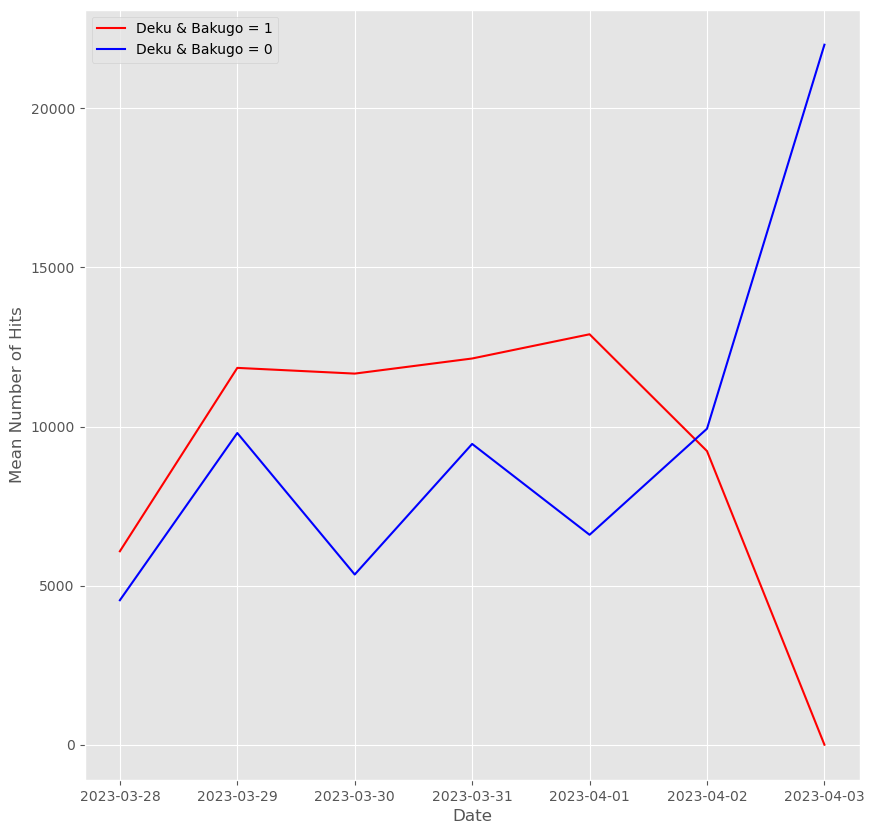

In [16]:
fig, ax = plt.subplots()
ax.plot(grouped_data.index, grouped_data[1], color='red', label='Deku & Bakugo = 1')
ax.plot(grouped_data.index, grouped_data[0], color='blue', label='Deku & Bakugo = 0')

# Add axis labels and a legend
ax.set_xlabel('Date')
ax.set_ylabel('Mean Number of Hits')
ax.legend()

# Show the plot
plt.show()

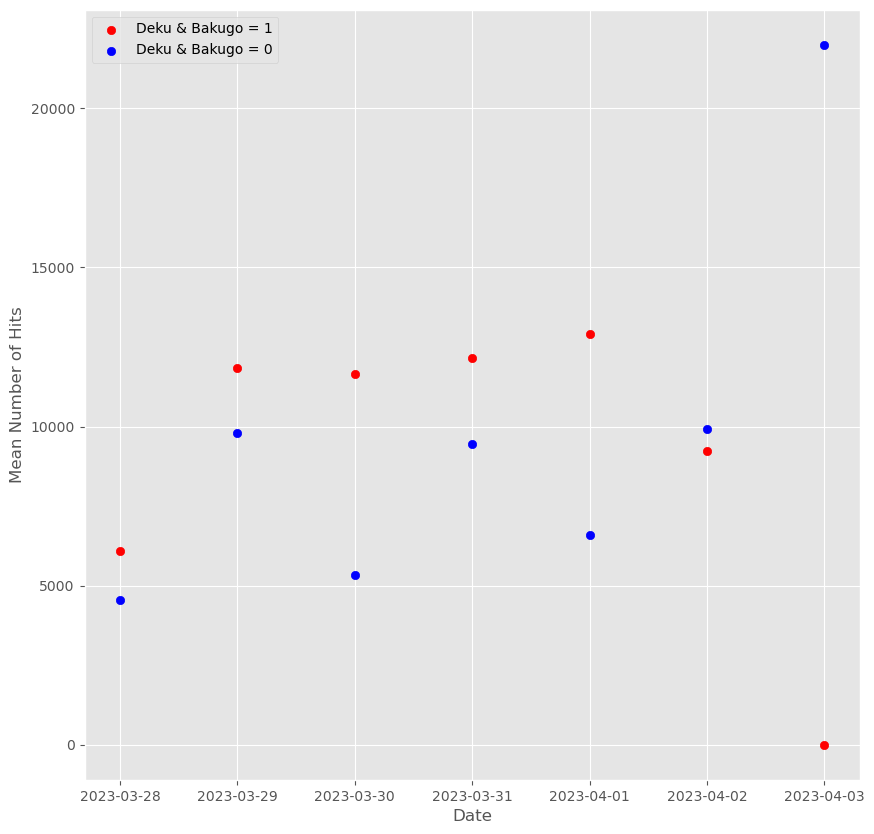

In [17]:
fig, ax = plt.subplots()
ax.scatter(grouped_data.index, grouped_data[1], color='red', label='Deku & Bakugo = 1')
ax.scatter(grouped_data.index, grouped_data[0], color='blue', label='Deku & Bakugo = 0')

# Add axis labels and a legend
ax.set_xlabel('Date')
ax.set_ylabel('Mean Number of Hits')
ax.legend()

# Show the plot
plt.show()

In [21]:
AO3 = AO3_train.iloc[:, :6]

In [27]:
AO3['ships'] = AO3['ships'].apply(ast.literal_eval)

In [28]:
AO3.explode('ships')

,title,mixed fandom,ships,characters,hits,kudos
0,Purple poison flames meet Blue fire,['Fandoms:\n鬼滅の刃 | Demon Slayer: Kimetsu no Ya...,Dabi | Todoroki Touya & Kochou Shinobu,"['Dabi | Todoroki Touya', 'Kochou Shinobu']",0,NaN
1,Stuck With Babysitter Duty,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,Dazai Osamu/Nakahara Chuuya (Bungou Stray Dogs),"['Midoriya Izuku', 'Dazai Osamu (Bungou Stray ...",0,NaN
2,Power in UA!!!,"['Fandoms:\nChainsaw Man (Anime), 僕のヒーローアカデミア ...",Bakugou Katsuki/Power,"['Power (Chainsaw Man)', 'Ashido Mina', 'Iida ...",508,7.0
2,Power in UA!!!,"['Fandoms:\nChainsaw Man (Anime), 僕のヒーローアカデミア ...",Power & Class 1-A,"['Power (Chainsaw Man)', 'Ashido Mina', 'Iida ...",508,7.0
3,Balance and Bondeds,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,Aizawa Shouta | Eraserhead/Yamada Hizashi | Pr...,"['Midoriya Izuku', 'Midoriya Inko', 'Bakugou K...",11924,481.0
...,...,...,...,...,...,...
1998,Boku No Hero Academia: Ones Way,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,NaN,"['Mia Ikati', 'Rue Achlys', 'Ryuuji Takao', 'I...",44,NaN
1999,Up the Anti: My Hero Academia New Generation,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,Midoriya Izuku/Sero Hanta,"['Midoriya Izuku', 'Sero Hanta', 'Bakugou Kats...",28,NaN
1999,Up the Anti: My Hero Academia New Generation,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,Bakugou Katsuki/Kirishima Eijirou,"['Midoriya Izuku', 'Sero Hanta', 'Bakugou Kats...",28,NaN
1999,Up the Anti: My Hero Academia New Generation,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,Iida Tenya/Uraraka Ochako,"['Midoriya Izuku', 'Sero Hanta', 'Bakugou Kats...",28,NaN


In [41]:
AO3_ship_hit = AO3[['ships', 'hits']].explode('ships')

In [60]:
AO3_correlation = AO3_train.corr()

In [61]:
AO3_correlation

,hits,kudos,Deku,Bakugo,Deku & Bakugo,Aizawa,Prez Mic,Aizawa & Prez Mic,Aizawa & Deku,Enjiro,...,Kirashima,Mina & Kirashima,Jirou,Jirou & Denki,Shigaraki Tomura,Deku & Shigaraki Tomura,Aizawa & Shinsou,Nedzu,Deku & Nedzu,Deku & Reader
hits,1.000000,0.780337,0.081816,0.027551,0.038302,0.093322,0.074998,0.076003,0.109676,NaN,...,0.003351,0.003351,0.028637,0.028637,0.030649,0.030649,0.097956,0.035509,0.035509,0.000165
kudos,0.780337,1.000000,0.131677,0.051948,0.064698,0.179720,0.154888,0.156442,0.198957,NaN,...,-0.017673,-0.017673,0.002676,0.002676,0.062806,0.062806,0.182220,0.057616,0.057616,0.007261
Deku,0.081816,0.131677,1.000000,0.578086,0.686998,0.278392,0.164043,0.160362,0.459155,NaN,...,0.156415,0.156415,0.148520,0.148520,0.230161,0.230161,0.194701,0.162602,0.162602,0.162602
Bakugo,0.027551,0.051948,0.578086,1.000000,0.907118,0.045432,-0.006953,-0.006896,0.139146,NaN,...,0.202805,0.202805,0.170978,0.170978,0.102791,0.102791,0.092558,0.013065,0.013065,0.117359
Deku & Bakugo,0.038302,0.064698,0.686998,0.907118,1.000000,0.074765,0.018290,0.018066,0.184681,NaN,...,0.211581,0.211581,0.181171,0.181171,0.126786,0.126786,0.104250,0.027908,0.027908,0.135896
Aizawa,0.093322,0.179720,0.278392,0.045432,0.074765,1.000000,0.816343,0.821647,0.830892,NaN,...,0.022922,0.022922,0.039042,0.039042,0.086725,0.086725,0.574387,0.206238,0.206238,0.006221
Prez Mic,0.074998,0.154888,0.164043,-0.006953,0.018290,0.816343,1.000000,0.994400,0.585728,NaN,...,0.038799,0.038799,0.031818,0.031818,0.047757,0.047757,0.527770,0.148774,0.148774,-0.013490
Aizawa & Prez Mic,0.076003,0.156442,0.160362,-0.006896,0.018066,0.821647,0.994400,1.000000,0.589779,NaN,...,0.040014,0.040014,0.032828,0.032828,0.048843,0.048843,0.531042,0.149983,0.149983,-0.012904
Aizawa & Deku,0.109676,0.198957,0.459155,0.139146,0.184681,0.830892,0.585728,0.589779,1.000000,NaN,...,0.054392,0.054392,0.057207,0.057207,0.131104,0.131104,0.524539,0.255346,0.255346,0.030830
Enjiro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


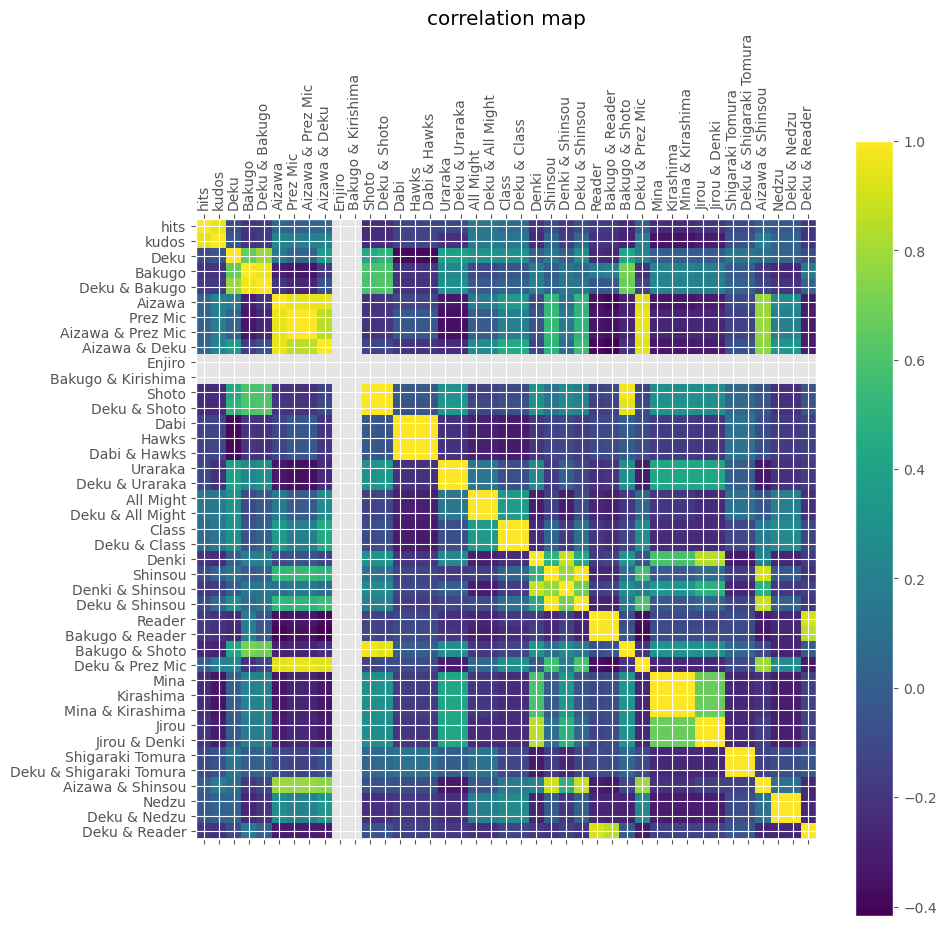

In [74]:
plt.matshow(AO3_correlation.corr())
plt.colorbar()
plt.xticks(ticks=range(len(AO3_correlation.columns)), labels=AO3_correlation.columns, rotation=90)
plt.yticks(ticks=range(len(AO3_correlation.columns)), labels=AO3_correlation.columns, rotation=0)
plt.title('correlation map')
plt.show()